# Image Classification Model

## Problem Statement

Images are one of the major sources of data in the field of data science and AI. This field is making appropriate use of information that can be gathered through images by examining its features and details. We are trying to give you an exposure of how an end to end project is developed in this field. 
The idea behind this project is to build a deep learning-based Image Classification model on images that will be scraped from e-commerce portal. This is done to make the model more and more robust. 

In [1]:
# Importing Useful Libraries
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras import optimizers
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
from os import listdir
import random
import scipy
import pylab as pl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings 
warnings.filterwarnings("ignore")

### Loading Directories

In [2]:
Train_data_dir=r'Garments/Train'
validation_data_dir=r'Garment/Test'

In [3]:
# Seeing the number of classes in the training folder
file = os.listdir(r"Garments/Train")
file

['Jeans (men)', 'Sarees (women)', 'Trousers (men)']

In [6]:
import shutil
import requests

### Loading Some Scrapped Image Samples

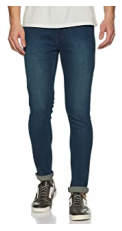

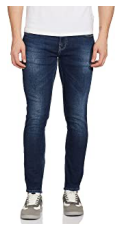

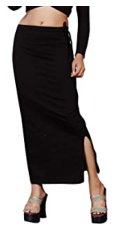

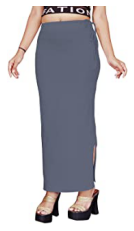

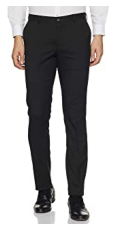

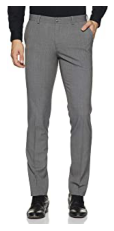

In [11]:
# Sample images which I have scrapped from amazon e-commerce website
import matplotlib.image as mpimg
Jeans_train=r"Garments/Train/Jeans (men)"
Saree_train=r"Garments/Train/Sarees (women)"
Trouser_train=r"Garments/Train/Trousers (men)"


Dir_train=[Jeans_train, Saree_train, Trouser_train]
for dirs in Dir_train:
    k=listdir(dirs)
    for i in k[:2]:
        img=mpimg.imread('{}/{}'.format(dirs,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

In [6]:
# Defining Dimensions for the image to be input and then loading the images
input_shape=(576,576,3)
img_width=576
img_height=576
nb_train_samples=192
nb_validation_samples=48
batch_size=8
epoch=150

### Preparing Data for Training

In [7]:
# Training Data Generator (Data Augmentation on Training Images)

Train_generator_augmented=ImageDataGenerator(rescale=1./255,
                                             zoom_range=0.2,
                                             rotation_range=30,
                                             horizontal_flip=True)
Train_generator=Train_generator_augmented.flow_from_directory(Train_data_dir,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size, 
                                                              class_mode='categorical')

# Validation Data Generator
Data_gen=ImageDataGenerator(rescale=1./255)
validation_generator=Data_gen.flow_from_directory(validation_data_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size, 
                                                  class_mode='categorical')

Found 718 images belonging to 3 classes.
Found 157 images belonging to 3 classes.


### Building CNN Model

In [8]:
# Developing a convolutional neural network to classify images for correct labels
model=Sequential()

# First convolution layer
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second convolution layer
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Fourth convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 574, 574, 32)      896       
                                                                 
 activation (Activation)     (None, 574, 574, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 287, 287, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 287, 287, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 285, 285, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 285, 285, 32)      0         
                                                        

### Defining Early stopping and Model check point

In [9]:
# Defining Early stopping and Model check point
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
MC = ModelCheckpoint('Image_Classification.h5', monitor='val_accuracy', 
                      mode='max', verbose=1, save_best_only=True)

### Fitting the data into the model

In [10]:
# Fitting the Training Data
history = model.fit_generator(
    Train_generator, 
    epochs=epoch,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    steps_per_epoch=nb_train_samples//batch_size,
    callbacks=[ES,MC])

Epoch 1/150
24/24 [==============================] - ETA: 0s - loss: 4.9663 - accuracy: 0.3789
Epoch 00001: val_accuracy improved from -inf to 0.22917, saving model to Image_Classification.h5
24/24 [==============================] - 37s 1s/step - loss: 4.9663 - accuracy: 0.3789 - val_loss: 1.1401 - val_accuracy: 0.2292
Epoch 2/150
24/24 [==============================] - ETA: 0s - loss: 1.1608 - accuracy: 0.4158
Epoch 00002: val_accuracy improved from 0.22917 to 0.54167, saving model to Image_Classification.h5
24/24 [==============================] - 44s 2s/step - loss: 1.1608 - accuracy: 0.4158 - val_loss: 1.0854 - val_accuracy: 0.5417
Epoch 3/150
24/24 [==============================] - ETA: 0s - loss: 1.0504 - accuracy: 0.4115
Epoch 00003: val_accuracy did not improve from 0.54167
24/24 [==============================] - 44s 2s/step - loss: 1.0504 - accuracy: 0.4115 - val_loss: 0.9951 - val_accuracy: 0.4792
Epoch 4/150
24/24 [==============================] - ETA: 0s - loss: 1.0872 

### On 75 Epoch itself the val_accuracy is: 87.50% and val_loss: 37.43%,thus saving the best model

In [11]:
# Model Evaluation
evl=model.evaluate(validation_generator,steps=1)
print("Test Loss",evl[0])
print("Test Accuracy",evl[1])

1/1 [==============================] - 0s 355ms/step - loss: 0.3570 - accuracy: 0.7500
Test Loss 0.3570001721382141
Test Accuracy 0.75


### Saving the best model

In [12]:
# Saving the best model where val_accuracy is maximum.
model.save('Image_Classification.h5')

In [13]:
# 75 Epochs Summary
pd.DataFrame(history.history)

loss  accuracy  val_loss  val_accuracy
0   4.966259  0.378947  1.140150      0.229167
1   1.160837  0.415789  1.085403      0.541667
2   1.050361  0.411458  0.995111      0.479167
3   1.087159  0.521053  0.797741      0.666667
4   0.824497  0.572917  1.072278      0.458333
..       ...       ...       ...           ...
70  0.458445  0.815789  0.488716      0.812500
71  0.445122  0.796875  0.841089      0.770833
72  0.405238  0.821053  0.746799      0.666667
73  0.536051  0.817708  0.699742      0.791667
74  0.374304  0.843750  0.638309      0.812500

[75 rows x 4 columns]

### Visualizing Training

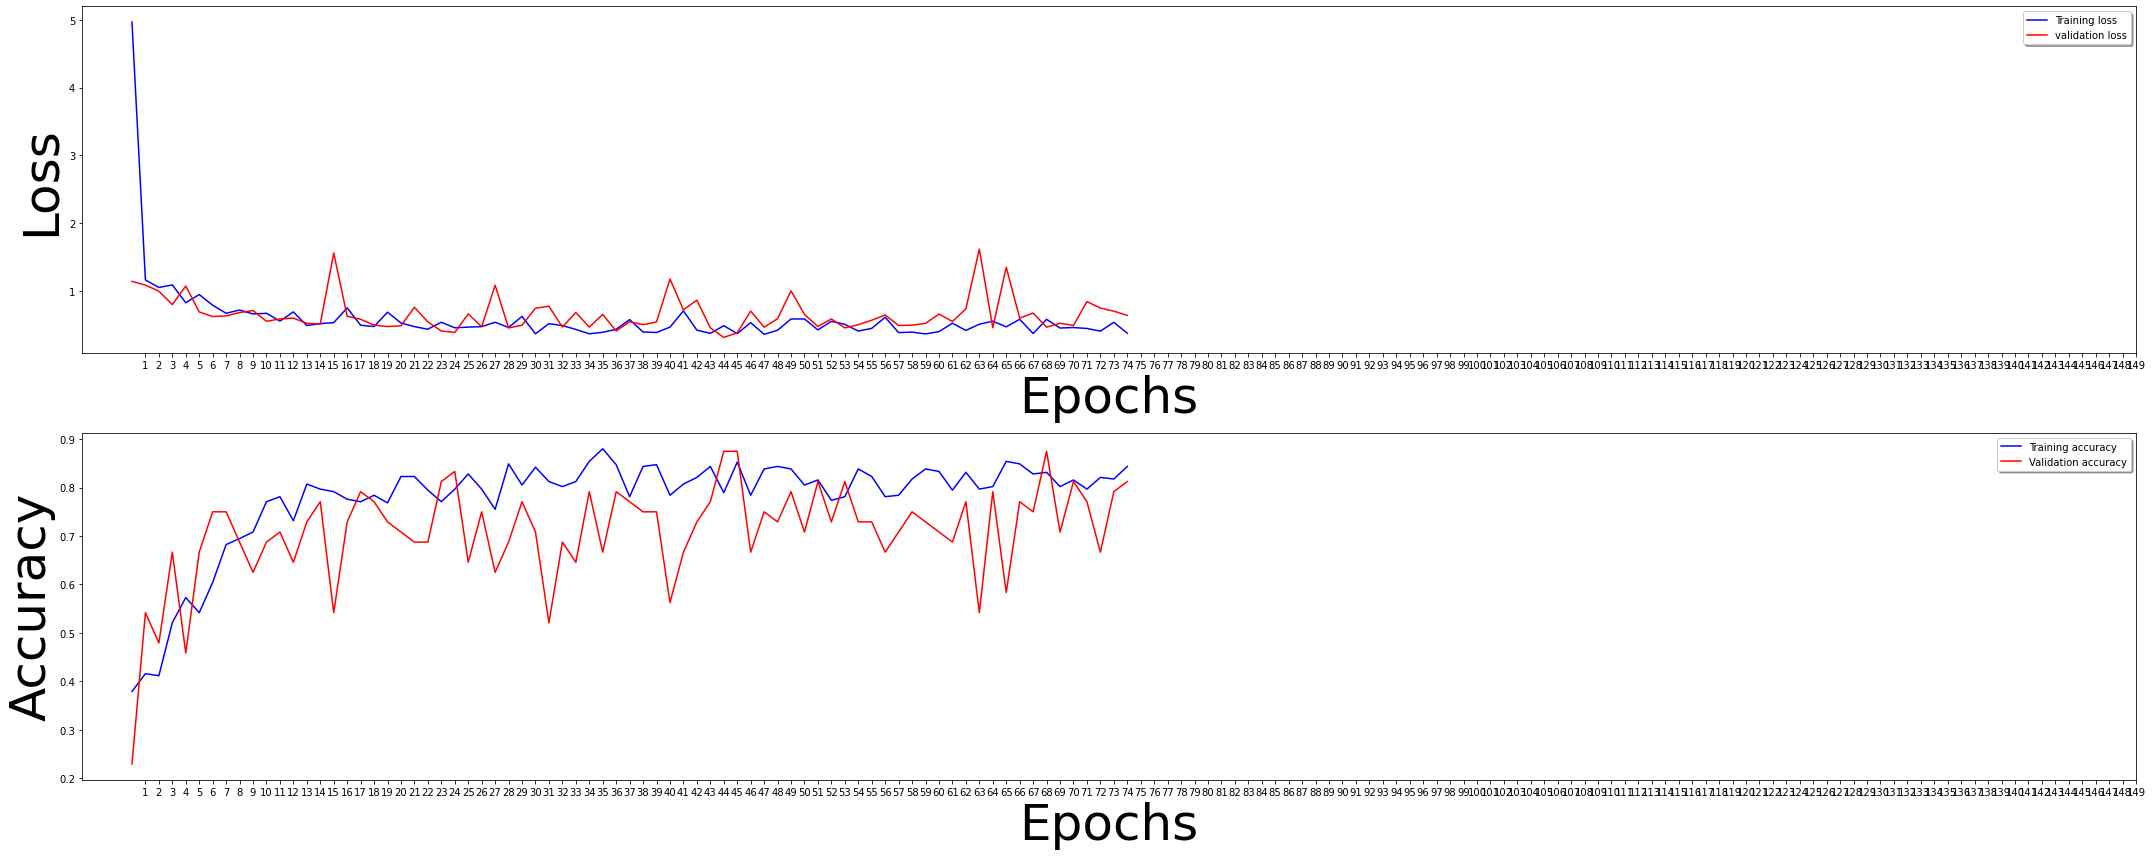

In [14]:
# Visualizing  Training
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epoch, 1),)
ax1.set_xlabel('Epochs' ,fontsize=50)
ax1.set_ylabel('Loss' ,fontsize=50)
ax1.legend(loc='best', shadow=True)

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xlabel('Epochs' ,fontsize=50)
ax2.set_ylabel('Accuracy' ,fontsize=50)
ax2.set_xticks(np.arange(1, epoch, 1))

ax2.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

### As we can see that accuracy is increasing and losses are decreasing as number of epochs are increasing.

In [15]:
# As we can see that there are 3 classes for the 157 test images
print(validation_generator.classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]


In [16]:
# Lets load our model
saved_model = load_model('Image_Classification.h5')

### Predicting Images

Input Image is: img_01.jpeg


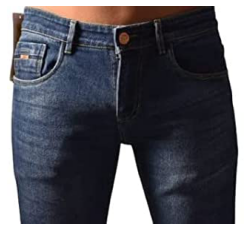

Predicted Label is: jeans

Input Image is: img_101.jpeg


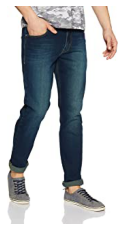

Predicted Label is: jeans

Input Image is: img_11.jpeg


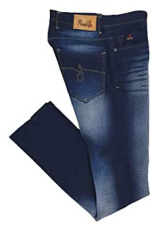

Predicted Label is: sarees

Input Image is: img_111.jpeg


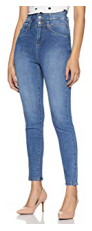

Predicted Label is: jeans

Input Image is: img_121.jpeg


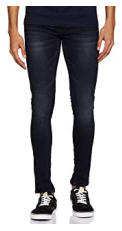

Predicted Label is: trouser

Input Image is: img_131.jpeg


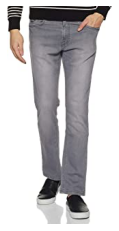

Predicted Label is: trouser

Input Image is: img_141.jpeg


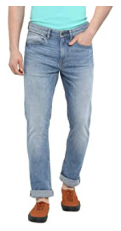

Predicted Label is: jeans

Input Image is: img_151.jpeg


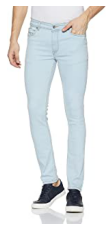

Predicted Label is: trouser

Input Image is: img_161.jpeg


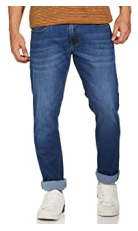

Predicted Label is: jeans

Input Image is: img_171.jpeg


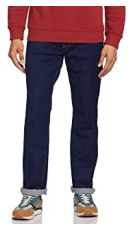

Predicted Label is: jeans

Input Image is: img_181.jpeg


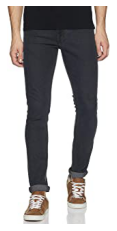

Predicted Label is: jeans

Input Image is: img_191.jpeg


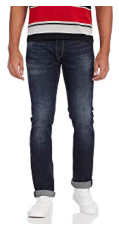

Predicted Label is: trouser

Input Image is: img_201.jpeg


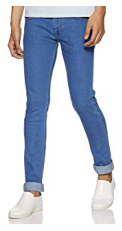

Predicted Label is: jeans

Input Image is: img_21.jpeg


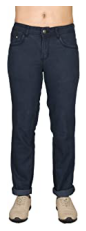

Predicted Label is: trouser

Input Image is: img_211.jpeg


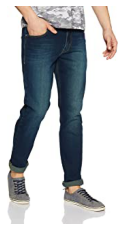

Predicted Label is: jeans

Input Image is: img_221.jpeg


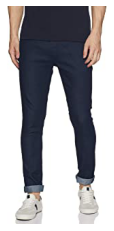

Predicted Label is: jeans

Input Image is: img_231.jpeg


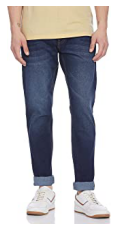

Predicted Label is: jeans

Input Image is: img_241.jpeg


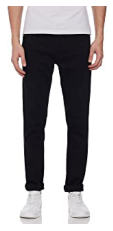

Predicted Label is: trouser

Input Image is: img_251.jpeg


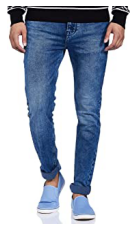

Predicted Label is: jeans

Input Image is: img_261.jpeg


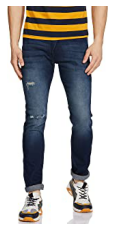

Predicted Label is: jeans

Input Image is: img_271.jpeg


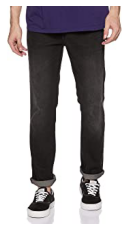

Predicted Label is: trouser

Input Image is: img_281.jpeg


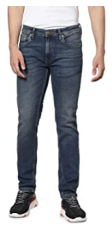

Predicted Label is: trouser

Input Image is: img_291.jpeg


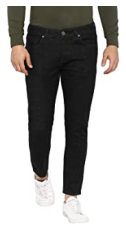

Predicted Label is: trouser

Input Image is: img_301.jpeg


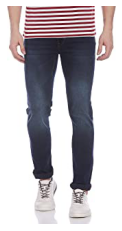

Predicted Label is: trouser

Input Image is: img_31.jpeg


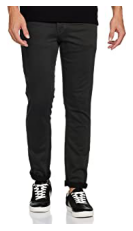

Predicted Label is: trouser

Input Image is: img_311.jpeg


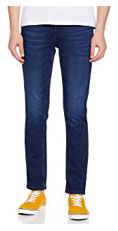

Predicted Label is: jeans

Input Image is: img_321.jpeg


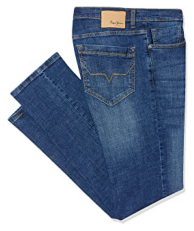

Predicted Label is: sarees

Input Image is: img_331.jpeg


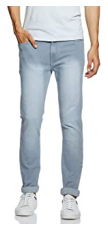

Predicted Label is: jeans

Input Image is: img_341.jpeg


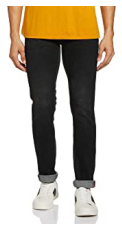

Predicted Label is: jeans

Input Image is: img_351.jpeg


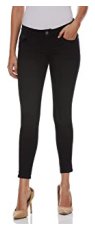

Predicted Label is: trouser

Input Image is: img_361.jpeg


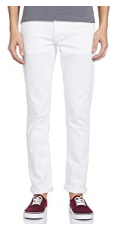

Predicted Label is: jeans

Input Image is: img_371.jpeg


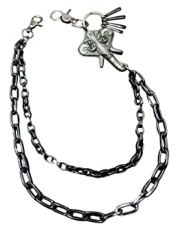

Predicted Label is: trouser

Input Image is: img_381.jpeg


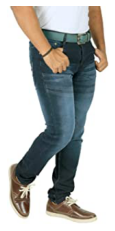

Predicted Label is: jeans

Input Image is: img_391.jpeg


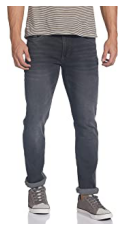

Predicted Label is: trouser

Input Image is: img_401.jpeg


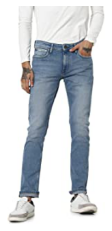

Predicted Label is: trouser

Input Image is: img_41.jpeg


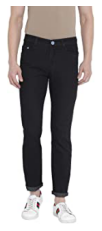

Predicted Label is: trouser

Input Image is: img_411.jpeg


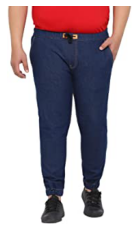

Predicted Label is: jeans

Input Image is: img_421.jpeg


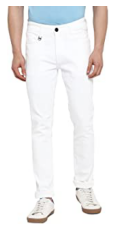

Predicted Label is: jeans

Input Image is: img_431.jpeg


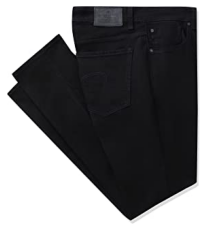

Predicted Label is: trouser

Input Image is: img_441.jpeg


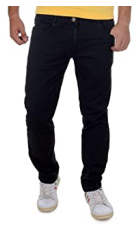

Predicted Label is: jeans

Input Image is: img_451.jpeg


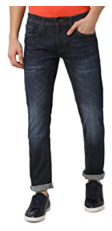

Predicted Label is: jeans

Input Image is: img_461.jpeg


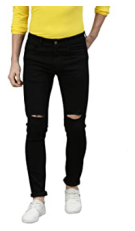

Predicted Label is: jeans

Input Image is: img_471.jpeg


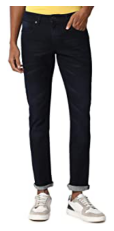

Predicted Label is: trouser

Input Image is: img_481.jpeg


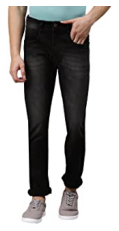

Predicted Label is: trouser

Input Image is: img_491.jpeg


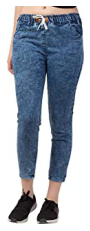

Predicted Label is: jeans

Input Image is: img_501.jpeg


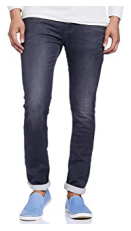

Predicted Label is: trouser

Input Image is: img_51.jpeg


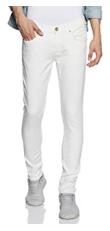

Predicted Label is: jeans

Input Image is: img_511.jpeg


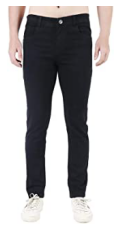

Predicted Label is: trouser

Input Image is: img_521.jpeg


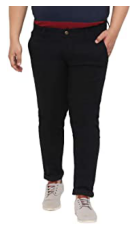

Predicted Label is: jeans

Input Image is: img_531.jpeg


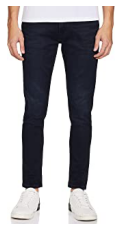

Predicted Label is: trouser

Input Image is: img_541.jpeg


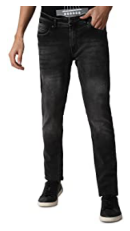

Predicted Label is: jeans

Input Image is: img_551.jpeg


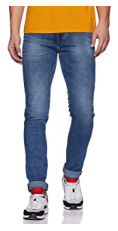

Predicted Label is: jeans

Input Image is: img_561.jpeg


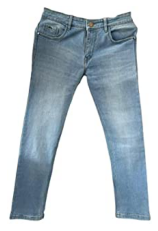

Predicted Label is: jeans

Input Image is: img_571.jpeg


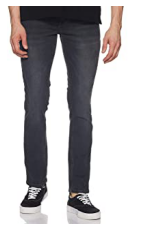

Predicted Label is: jeans

Input Image is: img_581.jpeg


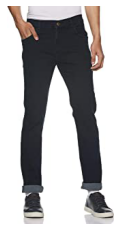

Predicted Label is: trouser

Input Image is: img_591.jpeg


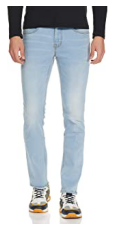

Predicted Label is: jeans

Input Image is: img_61.jpeg


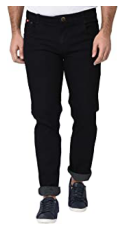

Predicted Label is: trouser

Input Image is: img_71.jpeg


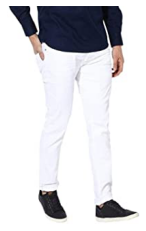

Predicted Label is: jeans

Input Image is: img_81.jpeg


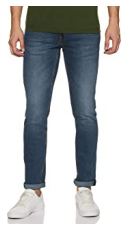

Predicted Label is: jeans

Input Image is: img_91.jpeg


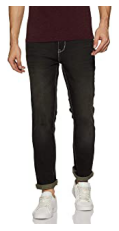

Predicted Label is: jeans

Input Image is: img_01.jpeg


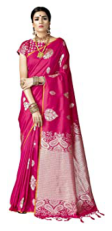

Predicted Label is: sarees

Input Image is: img_101.jpeg


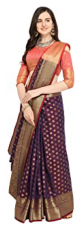

Predicted Label is: sarees

Input Image is: img_11.jpeg


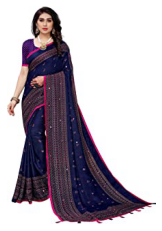

Predicted Label is: sarees

Input Image is: img_111.jpeg


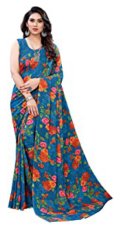

Predicted Label is: sarees

Input Image is: img_121.jpeg


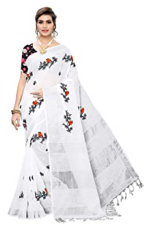

Predicted Label is: jeans

Input Image is: img_131.jpeg


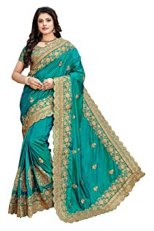

Predicted Label is: sarees

Input Image is: img_141.jpeg


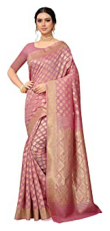

Predicted Label is: sarees

Input Image is: img_151.jpeg


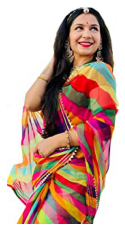

Predicted Label is: sarees

Input Image is: img_161.jpeg


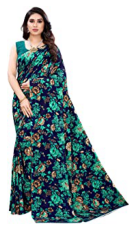

Predicted Label is: sarees

Input Image is: img_171.jpeg


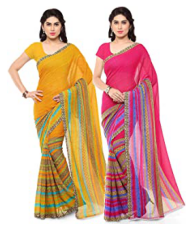

Predicted Label is: sarees

Input Image is: img_181.jpeg


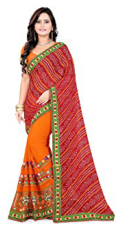

Predicted Label is: sarees

Input Image is: img_191.jpeg


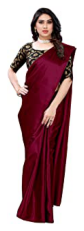

Predicted Label is: sarees

Input Image is: img_201.jpeg


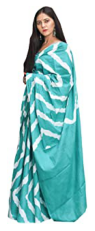

Predicted Label is: sarees

Input Image is: img_21.jpeg


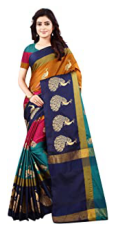

Predicted Label is: sarees

Input Image is: img_211.jpeg


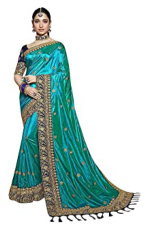

Predicted Label is: sarees

Input Image is: img_221.jpeg


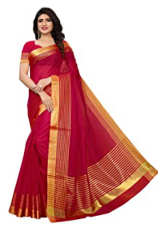

Predicted Label is: sarees

Input Image is: img_231.jpeg


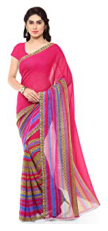

Predicted Label is: sarees

Input Image is: img_241.jpeg


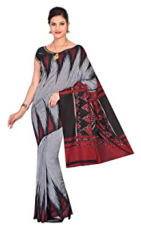

Predicted Label is: sarees

Input Image is: img_251.jpeg


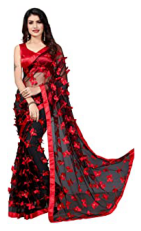

Predicted Label is: sarees

Input Image is: img_261.jpeg


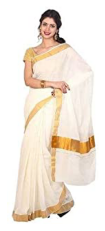

Predicted Label is: sarees

Input Image is: img_271.jpeg


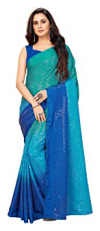

Predicted Label is: sarees

Input Image is: img_281.jpeg


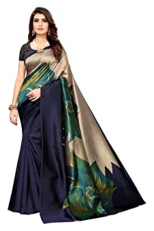

Predicted Label is: sarees

Input Image is: img_291.jpeg


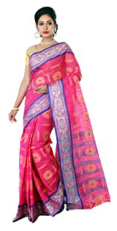

Predicted Label is: sarees

Input Image is: img_301.jpeg


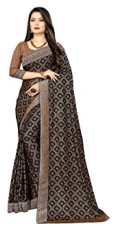

Predicted Label is: jeans

Input Image is: img_31.jpeg


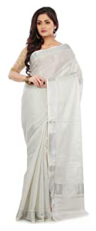

Predicted Label is: jeans

Input Image is: img_311.jpeg


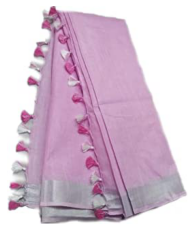

Predicted Label is: trouser

Input Image is: img_321.jpeg


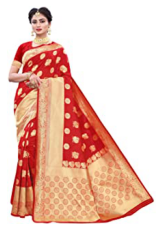

Predicted Label is: sarees

Input Image is: img_331.jpeg


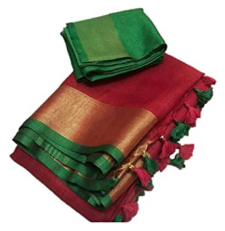

Predicted Label is: sarees

Input Image is: img_341.jpeg


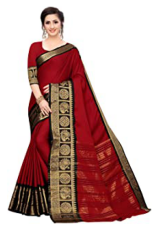

Predicted Label is: sarees

Input Image is: img_351.jpeg


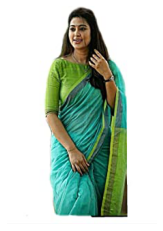

Predicted Label is: sarees

Input Image is: img_361.jpeg


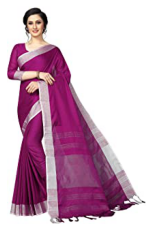

Predicted Label is: sarees

Input Image is: img_371.jpeg


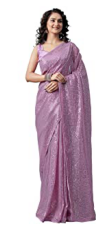

Predicted Label is: sarees

Input Image is: img_381.jpeg


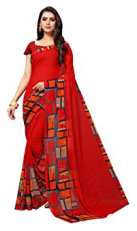

Predicted Label is: sarees

Input Image is: img_391.jpeg


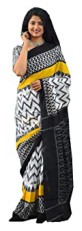

Predicted Label is: sarees

Input Image is: img_401.jpeg


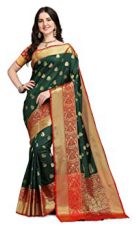

Predicted Label is: sarees

Input Image is: img_41.jpeg


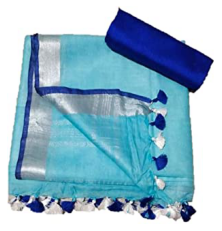

Predicted Label is: sarees

Input Image is: img_411.jpeg


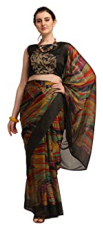

Predicted Label is: sarees

Input Image is: img_421.jpeg


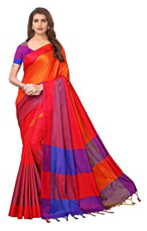

Predicted Label is: sarees

Input Image is: img_431.jpeg


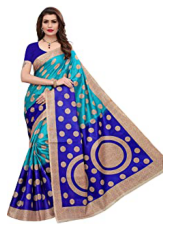

Predicted Label is: sarees

Input Image is: img_441.jpeg


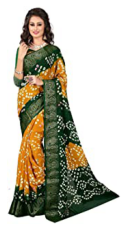

Predicted Label is: sarees

Input Image is: img_451.jpeg


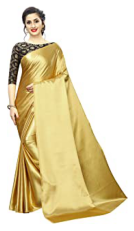

Predicted Label is: sarees

Input Image is: img_461.jpeg


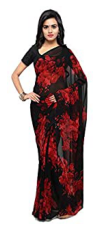

Predicted Label is: sarees

Input Image is: img_471.jpeg


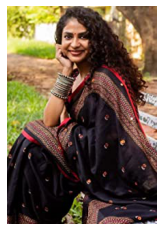

Predicted Label is: jeans

Input Image is: img_481.jpeg


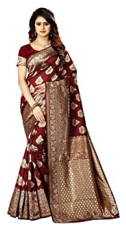

Predicted Label is: sarees

Input Image is: img_51.jpeg


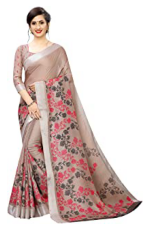

Predicted Label is: sarees

Input Image is: img_61.jpeg


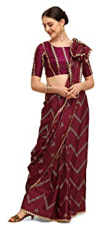

Predicted Label is: sarees

Input Image is: img_71.jpeg


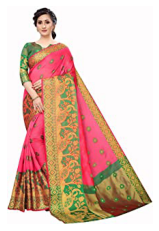

Predicted Label is: sarees

Input Image is: img_81.jpeg


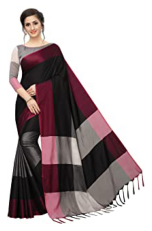

Predicted Label is: sarees

Input Image is: img_91.jpeg


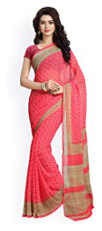

Predicted Label is: sarees

Input Image is: img_01.jpeg


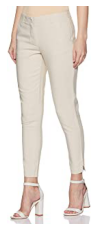

Predicted Label is: jeans

Input Image is: img_101.jpeg


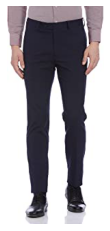

Predicted Label is: trouser

Input Image is: img_11.jpeg


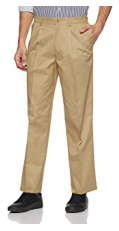

Predicted Label is: trouser

Input Image is: img_111.jpeg


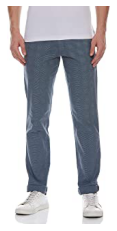

Predicted Label is: trouser

Input Image is: img_121.jpeg


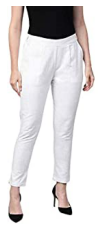

Predicted Label is: jeans

Input Image is: img_131.jpeg


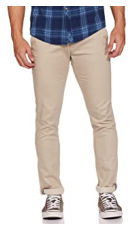

Predicted Label is: jeans

Input Image is: img_141.jpeg


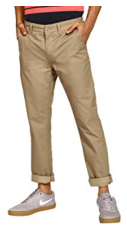

Predicted Label is: trouser

Input Image is: img_151.jpeg


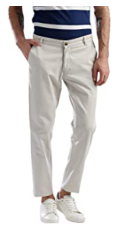

Predicted Label is: trouser

Input Image is: img_161.jpeg


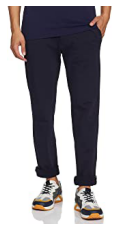

Predicted Label is: jeans

Input Image is: img_171.jpeg


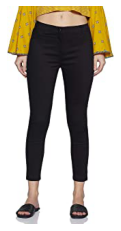

Predicted Label is: jeans

Input Image is: img_181.jpeg


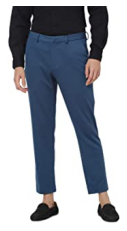

Predicted Label is: jeans

Input Image is: img_191.jpeg


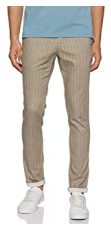

Predicted Label is: jeans

Input Image is: img_201.jpeg


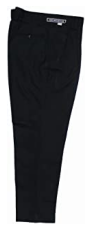

Predicted Label is: trouser

Input Image is: img_21.jpeg


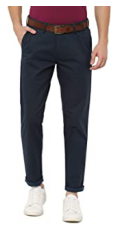

Predicted Label is: jeans

Input Image is: img_211.jpeg


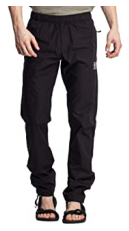

Predicted Label is: trouser

Input Image is: img_221.jpeg


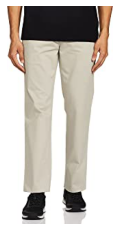

Predicted Label is: trouser

Input Image is: img_231.jpeg


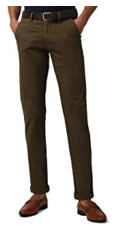

Predicted Label is: trouser

Input Image is: img_241.jpeg


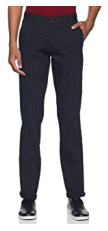

Predicted Label is: trouser

Input Image is: img_251.jpeg


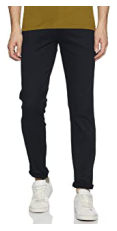

Predicted Label is: jeans

Input Image is: img_261.jpeg


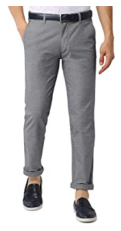

Predicted Label is: trouser

Input Image is: img_271.jpeg


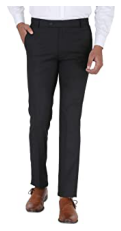

Predicted Label is: trouser

Input Image is: img_281.jpeg


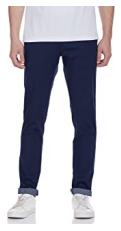

Predicted Label is: jeans

Input Image is: img_291.jpeg


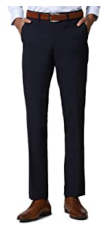

Predicted Label is: trouser

Input Image is: img_301.jpeg


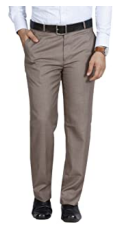

Predicted Label is: trouser

Input Image is: img_31.jpeg


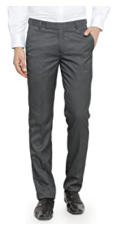

Predicted Label is: trouser

Input Image is: img_311.jpeg


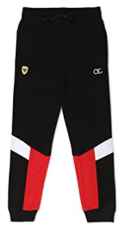

Predicted Label is: trouser

Input Image is: img_321.jpeg


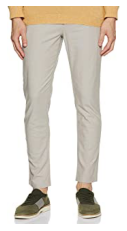

Predicted Label is: jeans

Input Image is: img_331.jpeg


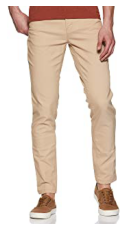

Predicted Label is: jeans

Input Image is: img_341.jpeg


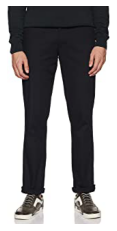

Predicted Label is: trouser

Input Image is: img_351.jpeg


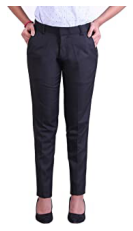

Predicted Label is: trouser

Input Image is: img_361.jpeg


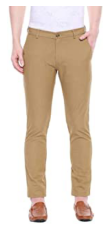

Predicted Label is: trouser

Input Image is: img_371.jpeg


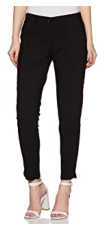

Predicted Label is: trouser

Input Image is: img_381.jpeg


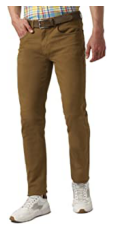

Predicted Label is: trouser

Input Image is: img_391.jpeg


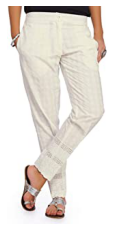

Predicted Label is: trouser

Input Image is: img_401.jpeg


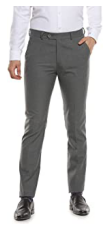

Predicted Label is: trouser

Input Image is: img_41.jpeg


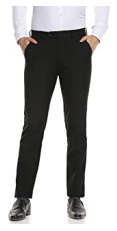

Predicted Label is: trouser

Input Image is: img_411.jpeg


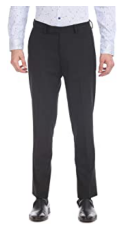

Predicted Label is: trouser

Input Image is: img_421.jpeg


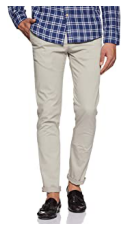

Predicted Label is: trouser

Input Image is: img_431.jpeg


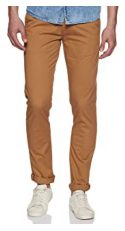

Predicted Label is: trouser

Input Image is: img_441.jpeg


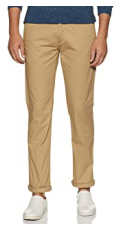

Predicted Label is: trouser

Input Image is: img_451.jpeg


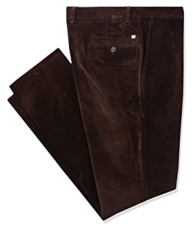

Predicted Label is: trouser

Input Image is: img_461.jpeg


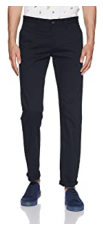

Predicted Label is: trouser

Input Image is: img_471.jpeg


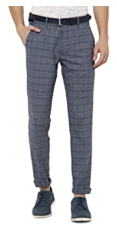

Predicted Label is: trouser

Input Image is: img_51.jpeg


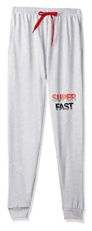

Predicted Label is: jeans

Input Image is: img_61.jpeg


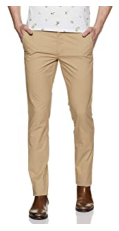

Predicted Label is: trouser

Input Image is: img_71.jpeg


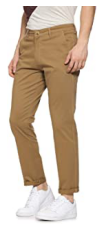

Predicted Label is: trouser

Input Image is: img_81.jpeg


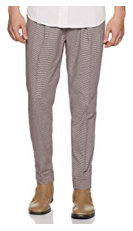

Predicted Label is: trouser

Input Image is: img_91.jpeg


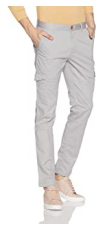

Predicted Label is: jeans



In [19]:
 # Predicted samples of the test images
test_jeans=r"Garment/Test/Jeans"
test_Saree=r"Garment/Test/Sarees"
test_trouser=r"Garment/Test/Trousers"


Predicted_class=[]
classes=[test_jeans,test_Saree,test_trouser]
for test_dir in classes:
    for i in listdir(test_dir):
        print("Input Image is:",i)
        img= image.load_img('{}/{}'.format(test_dir,i))                         
        test_image = image.load_img('{}/{}'.format(test_dir,i),target_size=(576, 576))
        test_image = image.img_to_array(test_image)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        test_image = np.expand_dims(test_image, axis=0)
        result = saved_model.predict(test_image)
        final=np.argmax(result, axis=1)[0]
        if final==0:
            print("Predicted Label is: jeans\n")
            Predicted_class.append("Jeans men")
        elif final==1:
            print("Predicted Label is: sarees\n")
            Predicted_class.append("Sarees")
        elif final==2:
            print("Predicted Label is: trouser\n")
            Predicted_class.append("trouser men")

### DataFrame to show the Actual and Predicted Label

In [21]:
result = pd.DataFrame()
result['Predicted_Label']=Predicted_class
result['Actual_Label']=validation_generator.classes
result["Actual_Label"] = result["Actual_Label"].replace({0: 'jeans men', 1: 'Sarees',2:'Trouser men'})
result

Predicted_Label Actual_Label
0         Jeans men    jeans men
1         Jeans men    jeans men
2            Sarees    jeans men
3         Jeans men    jeans men
4       trouser men    jeans men
..              ...          ...
152       Jeans men  Trouser men
153     trouser men  Trouser men
154     trouser men  Trouser men
155     trouser men  Trouser men
156       Jeans men  Trouser men

[157 rows x 2 columns]